Performing linear regression using kaggle 'House sales in King county,usa' data set
kaggle link for data set: https://www.kaggle.com/harlfoxem/housesalesprediction/code

importing necessary libaries to perform exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

importing data set

In [3]:
df = pd.read_csv("kc_house_data.csv")

check for missing values

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

1. No missing values found
Perform stastical analysis 

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Data visualisation

visualization for price 

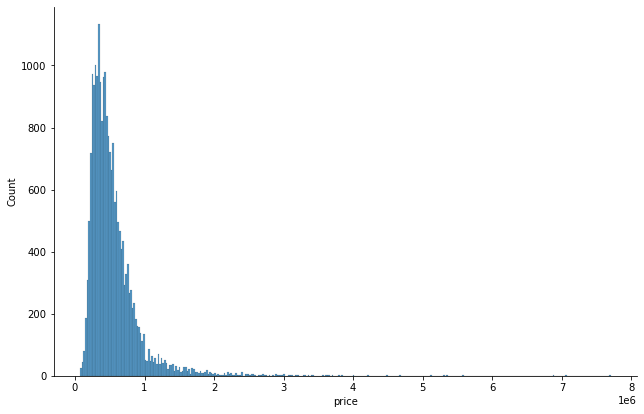

In [7]:
#plt.figure(figsize=(10,6))
h = sns.displot(df['price'])
h.fig.set_figwidth(10)
h.fig.set_figheight(6)

most of houses prices fall in between 0-1.5 million in price

visualization for number of bed rooms.bedroom is catagorical so countplot

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

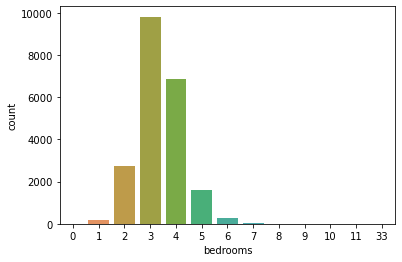

In [8]:
sns.countplot(x='bedrooms',data=df)

- In most of the houses the bedrooms in between 2-5

checking for any correlation

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

- the sqrt_living is highly corelated with the price
- zip code and id id negitively co related
checking co-relation of price with sqft_living using scatter plot

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

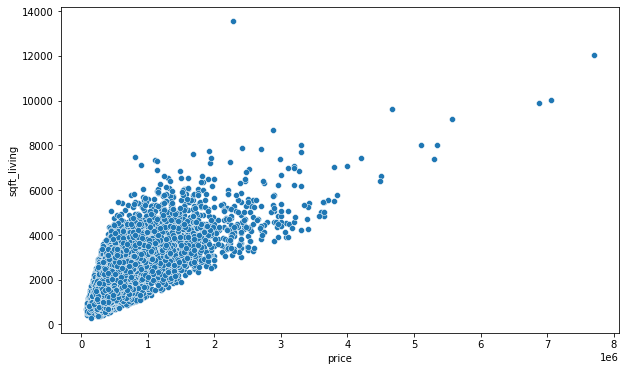

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

checking co-relation of price vs no of bathrooms using scatter plot

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

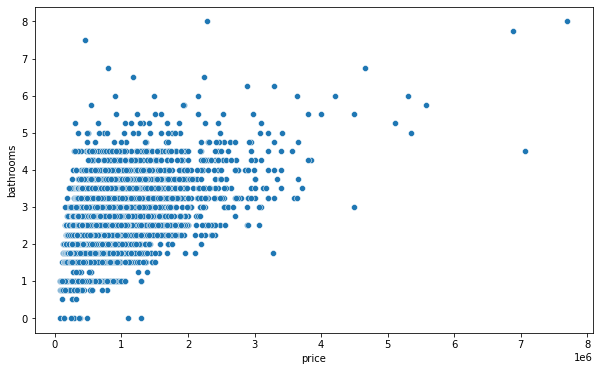

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='bathrooms',data=df)

boxplot of price vs bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

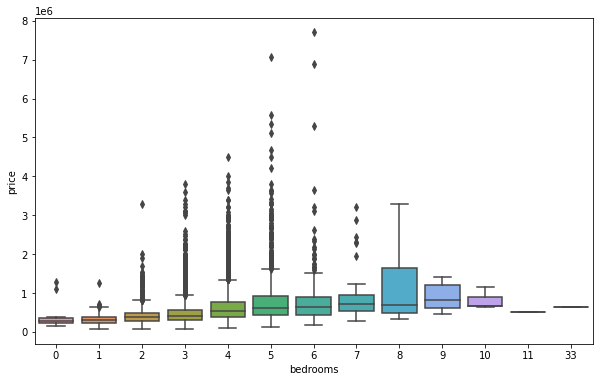

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

checking pries with latitude and longitude

<AxesSubplot:xlabel='price', ylabel='long'>

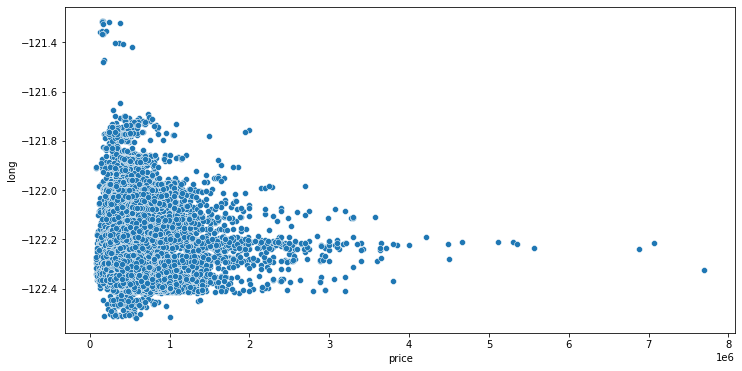

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='long',data=df)

expected a flat blob if there is no variation of longitude vs price.but the scatter plot is kind of distributted so longtitude has to be considered
here at ceretain longitute the price of houses goes up
- checking for latitute

<AxesSubplot:xlabel='price', ylabel='lat'>

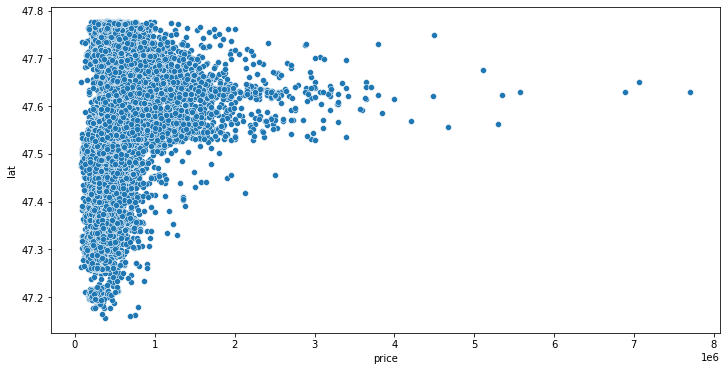

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='lat',data=df)


same behaviour of longitute applied for lattitute.at certain latitute expensive area- 
- plotting lattitute vs longitude to find expensive hotspot of the houses


<AxesSubplot:xlabel='long', ylabel='lat'>

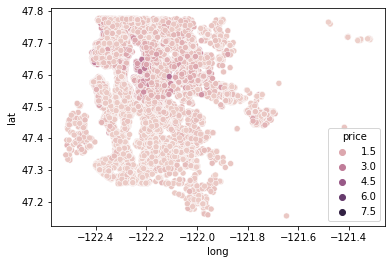

In [16]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

not getting clearer picture of map..cleaning up some outliers

In [17]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


There is a large drop in values of price from 7.7 million to 3.6 million after 20 expensive houses
- checking the how many houses in 1% of data set

In [18]:
len(df)*0.01

216.13

216 houses in 1 %..so creating another data frame not including top 1 %

In [19]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
#grabing everthing after 216 houses (ie is 99 %)
#to get much more color distribution in lat vs longitute

In [20]:
non_top_1_perc.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
19351,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,10,4065,0,1987,0,98039,47.6209,-122.237,3070,18713
11871,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,...,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
15377,1568100920,20150408T000000,1950000.0,4,2.50,3440,14554,2.0,1,4,...,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
556,5486800070,20140620T000000,1950000.0,7,3.50,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
16252,3760500280,20141014T000000,1950000.0,3,2.50,2510,12779,1.5,0,4,...,10,2510,0,1968,0,98034,47.6982,-122.231,2810,12225


plotting scatter plot of lat vs log



<AxesSubplot:xlabel='long', ylabel='lat'>

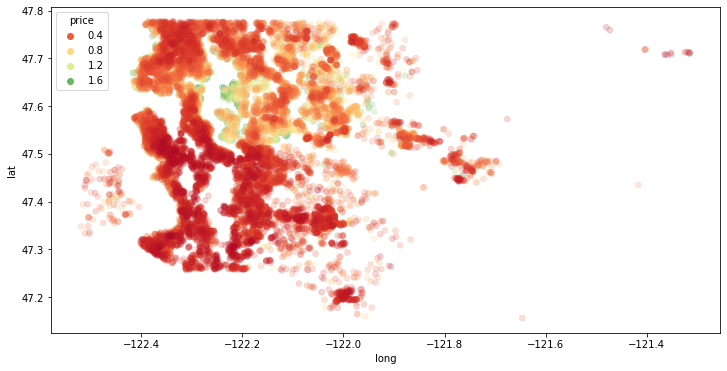

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

by comparing the map of the kingcounty the most expensive houses are in front of water front

<AxesSubplot:xlabel='waterfront', ylabel='price'>

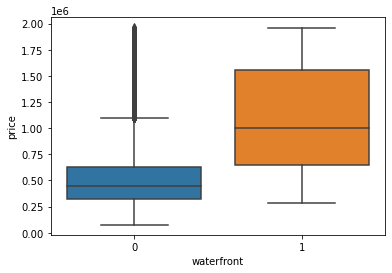

In [22]:
sns.boxplot(x='waterfront',y='price',data=non_top_1_perc)

By analysing the boxplot the water front property has higher price

### removing unwanted features

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id irrevelent .droping id

In [24]:
df = df.drop('id',axis=1)

checking date.date is parameter changing to data time stamp

In [25]:
df['date']=pd.to_datetime(df['date'])

In [26]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

extacting year from date time`

In [27]:
df['year'] = df['date'].apply(lambda date: date.year)

extacting month from date time`

In [28]:
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df.head()
#checking newly created month and year

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

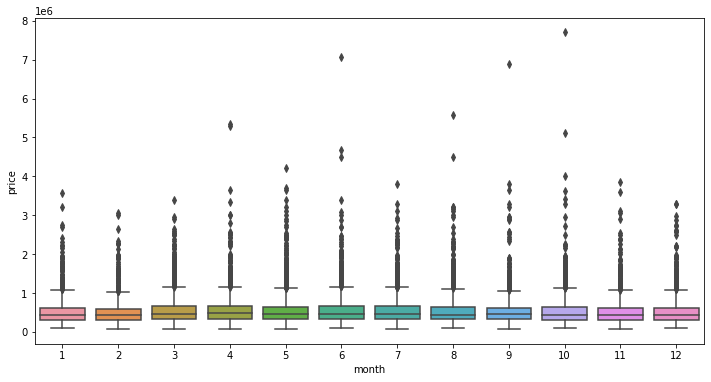

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month',y='price',data=df)

#checking prices go up by in any month
#hard to tell from this plot

<AxesSubplot:xlabel='month'>

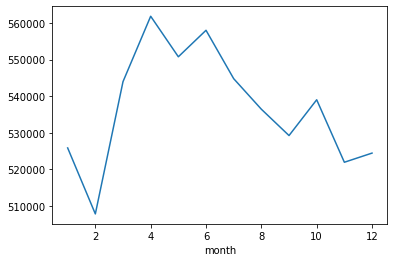

In [31]:
df.groupby('month').mean()['price'].plot()
#some behaviour in month but not lage difference

<AxesSubplot:xlabel='year', ylabel='price'>

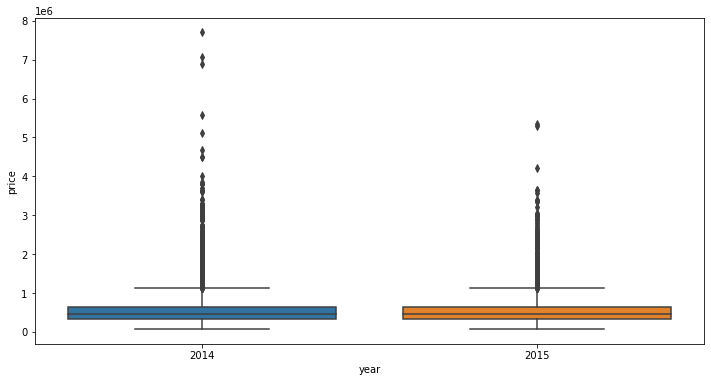

In [32]:
#checking behaviour for year
plt.figure(figsize=(12,6))
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='year'>

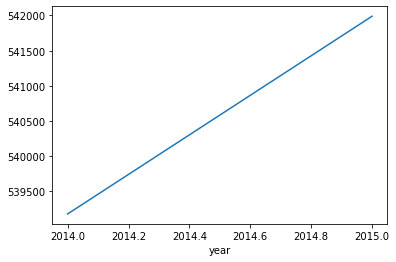

In [33]:
df.groupby('year').mean()['price'].plot()
#incresing price by year 

In [34]:
#droping date column
df.drop('date',axis=1,inplace=True)

In [35]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
#checking with zip code
df['zipcode'].value_counts()
#checking how many zip code have
#70 catagerios of zip code
#dropping zip codes

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df = df.drop('zipcode',axis=1)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [40]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [41]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

#seperate features from label

In [42]:
y=df['price'].values
X=df.drop('price',axis=1).values

importing sklearn and train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
X_train.shape

(15129, 19)

performing scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train=scaler.fit_transform(X_train)

In [49]:
X_test = scaler.fit_transform(X_test)

In [50]:
import tensorflow as tf

In [51]:
X_train.shape
X_train

array([[0.27272727, 0.3125    , 0.12301887, ..., 0.00510143, 1.        ,
        0.09090909],
       [0.36363636, 0.3125    , 0.17584906, ..., 0.00863256, 0.        ,
        0.54545455],
       [0.27272727, 0.3125    , 0.09811321, ..., 0.00375054, 0.        ,
        0.63636364],
       ...,
       [0.27272727, 0.28125   , 0.11245283, ..., 0.00800192, 0.        ,
        0.81818182],
       [0.18181818, 0.125     , 0.06490566, ..., 0.00420543, 0.        ,
        0.72727273],
       [0.27272727, 0.125     , 0.08754717, ..., 0.00813402, 1.        ,
        0.18181818]])

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [54]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 423636205568.0000 - val_loss: 433068769280.0000
Epoch 2/400
119/119 [==============================] - 0s 943us/step - loss: 423057588224.0000 - val_loss: 430708359168.0000
Epoch 3/400
119/119 [==============================] - 0s 951us/step - loss: 410912194560.0000 - val_loss: 401143267328.0000
Epoch 4/400
119/119 [==============================] - 0s 951us/step - loss: 338861490176.0000 - val_loss: 280057348096.0000
Epoch 5/400
119/119 [==============================] - 0s 959us/step - loss: 183206674432.0000 - val_loss: 128203259904.0000
Epoch 6/400
119/119 [==============================] - ETA: 0s - loss: 100427866112.00 - 0s 916us/step - loss: 102877847552.0000 - val_loss: 101392195584.0000
Epoch 7/400
119/119 [==============================] - 0s 999us/step - loss: 97449558016.0000 - val_loss: 99155165184.0000
Epoch 8/400
119/119 [==============================] - 0s 964us/step - loss: 95879094272.0000 -

119/119 [==============================] - 0s 875us/step - loss: 38491865088.0000 - val_loss: 39130275840.0000
Epoch 67/400
119/119 [==============================] - 0s 943us/step - loss: 38326874112.0000 - val_loss: 39220826112.0000
Epoch 68/400
119/119 [==============================] - 0s 938us/step - loss: 38103867392.0000 - val_loss: 39123652608.0000
Epoch 69/400
119/119 [==============================] - 0s 977us/step - loss: 37914185728.0000 - val_loss: 39572623360.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 37810110464.0000 - val_loss: 38908919808.0000
Epoch 71/400
119/119 [==============================] - 0s 994us/step - loss: 37618995200.0000 - val_loss: 39129571328.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 37519114240.0000 - val_loss: 39139266560.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37333032960.0000 - val_loss: 38472212480.0000
Epoch 74/400
119/119 [=====

119/119 [==============================] - 0s 952us/step - loss: 33193103360.0000 - val_loss: 37350518784.0000
Epoch 133/400
119/119 [==============================] - 0s 955us/step - loss: 33177421824.0000 - val_loss: 37807828992.0000
Epoch 134/400
119/119 [==============================] - 0s 999us/step - loss: 33127665664.0000 - val_loss: 37744377856.0000
Epoch 135/400
119/119 [==============================] - 0s 950us/step - loss: 33072156672.0000 - val_loss: 38304677888.0000
Epoch 136/400
119/119 [==============================] - 0s 942us/step - loss: 33047349248.0000 - val_loss: 37607088128.0000
Epoch 137/400
119/119 [==============================] - 0s 876us/step - loss: 33046401024.0000 - val_loss: 38183251968.0000
Epoch 138/400
119/119 [==============================] - 0s 914us/step - loss: 32986140672.0000 - val_loss: 38078726144.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32936988672.0000 - val_loss: 38049947648.0000
Epoch 140/400
11

Epoch 198/400
119/119 [==============================] - 0s 943us/step - loss: 31416608768.0000 - val_loss: 37226876928.0000
Epoch 199/400
119/119 [==============================] - 0s 877us/step - loss: 31379415040.0000 - val_loss: 37717733376.0000
Epoch 200/400
119/119 [==============================] - 0s 936us/step - loss: 31359481856.0000 - val_loss: 37327765504.0000
Epoch 201/400
119/119 [==============================] - 0s 938us/step - loss: 31394607104.0000 - val_loss: 37217198080.0000
Epoch 202/400
119/119 [==============================] - 0s 914us/step - loss: 31311642624.0000 - val_loss: 37572149248.0000
Epoch 203/400
119/119 [==============================] - 0s 900us/step - loss: 31316131840.0000 - val_loss: 37379399680.0000
Epoch 204/400
119/119 [==============================] - 0s 863us/step - loss: 31332077568.0000 - val_loss: 37620035584.0000
Epoch 205/400
119/119 [==============================] - 0s 931us/step - loss: 31312195584.0000 - val_loss: 37315960832.0000


Epoch 264/400
119/119 [==============================] - 0s 973us/step - loss: 30255368192.0000 - val_loss: 37976309760.0000
Epoch 265/400
119/119 [==============================] - 0s 962us/step - loss: 30253543424.0000 - val_loss: 37941784576.0000
Epoch 266/400
119/119 [==============================] - 0s 934us/step - loss: 30228979712.0000 - val_loss: 37728296960.0000
Epoch 267/400
119/119 [==============================] - 0s 930us/step - loss: 30245120000.0000 - val_loss: 37877751808.0000
Epoch 268/400
119/119 [==============================] - 0s 949us/step - loss: 30224771072.0000 - val_loss: 37340299264.0000
Epoch 269/400
119/119 [==============================] - 0s 865us/step - loss: 30195742720.0000 - val_loss: 37657436160.0000
Epoch 270/400
119/119 [==============================] - 0s 974us/step - loss: 30194061312.0000 - val_loss: 38225616896.0000
Epoch 271/400
119/119 [==============================] - 0s 935us/step - loss: 30176663552.0000 - val_loss: 38047539200.0000


119/119 [==============================] - 0s 926us/step - loss: 29298577408.0000 - val_loss: 38754033664.0000
Epoch 330/400
119/119 [==============================] - 0s 951us/step - loss: 29277016064.0000 - val_loss: 38789562368.0000
Epoch 331/400
119/119 [==============================] - 0s 958us/step - loss: 29260367872.0000 - val_loss: 38976991232.0000
Epoch 332/400
119/119 [==============================] - 0s 901us/step - loss: 29243695104.0000 - val_loss: 39054389248.0000
Epoch 333/400
119/119 [==============================] - 0s 915us/step - loss: 29233741824.0000 - val_loss: 39102689280.0000
Epoch 334/400
119/119 [==============================] - 0s 934us/step - loss: 29201252352.0000 - val_loss: 38812651520.0000
Epoch 335/400
119/119 [==============================] - 0s 888us/step - loss: 29196990464.0000 - val_loss: 39279366144.0000
Epoch 336/400
119/119 [==============================] - 0s 868us/step - loss: 29202274304.0000 - val_loss: 38931615744.0000
Epoch 337/400


Epoch 395/400
119/119 [==============================] - 0s 984us/step - loss: 28272838656.0000 - val_loss: 39545298944.0000
Epoch 396/400
119/119 [==============================] - 0s 918us/step - loss: 28257740800.0000 - val_loss: 39159713792.0000
Epoch 397/400
119/119 [==============================] - 0s 905us/step - loss: 28262432768.0000 - val_loss: 40141340672.0000
Epoch 398/400
119/119 [==============================] - 0s 932us/step - loss: 28238151680.0000 - val_loss: 40229560320.0000
Epoch 399/400
119/119 [==============================] - 0s 940us/step - loss: 28203732992.0000 - val_loss: 40044367872.0000
Epoch 400/400
119/119 [==============================] - 0s 977us/step - loss: 28186503168.0000 - val_loss: 39557849088.0000


In [55]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

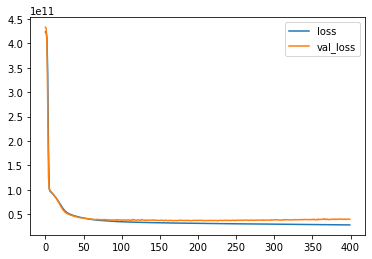

In [56]:
losses.plot()

#Evaluating test data

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [58]:
predictions = model.predict(X_test)

In [59]:
mean_squared_error(y_test,predictions)

39557846699.2935

In [60]:
np.sqrt(mean_squared_error(y_test,predictions))

198891.5450673897

In [61]:
mean_absolute_error(y_test,predictions)

133545.98993556254

In [62]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [63]:
explained_variance_score(y_test,predictions)
#predictions is not good

0.7573597995394145

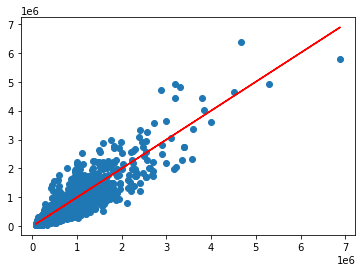

In [64]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
#not a straight line

checking model for data

In [65]:
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [66]:
single_house = df.drop('price',axis=1).iloc[0]

scaling to 0-1 range

In [67]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [68]:
single_house = scaler.transform(single_house.values.reshape(-1,19) ) #-1 add a extra bracket-keep all dimesion in this axis

In [69]:
model.predict(single_house)

array([[201304.3]], dtype=float32)

- The model performance is that much good.may the reson the under performance is the outliers in the data.Trying to optimize the model by removing outliers

In [70]:
#checking head and tail of the dataframe

df.sort_values('price',ascending=False).head(30)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,47.6298,-122.323,3940,8800,2014,10
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,47.6500,-122.214,3930,25449,2014,6
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,47.6305,-122.240,4540,42730,2014,9
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,47.6289,-122.233,3560,24345,2014,8
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,47.6232,-122.220,4600,21750,2015,4
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,47.5631,-122.210,4320,24619,2015,4
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,47.6767,-122.211,3430,26788,2014,10
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,47.5570,-122.210,3270,10454,2014,6
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,47.7493,-122.280,3030,23408,2014,8
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,47.6208,-122.219,3720,14592,2014,6


In [71]:
df.sort_values('price',ascending=False).tail(100)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
12724,130000.0,3,1.00,1100,5100,1.0,0,0,4,7,1100,0,1913,0,47.5231,-122.332,1450,5100,2015,3
9598,130000.0,2,1.00,780,5300,1.0,0,0,3,6,780,0,1941,0,47.5130,-122.354,780,5300,2015,3
14268,130000.0,2,1.00,840,6654,1.0,0,0,3,7,840,0,1951,0,47.7319,-122.335,1350,5831,2014,10
14001,130000.0,2,1.00,600,1500,1.0,0,0,4,4,600,0,1900,0,47.5289,-122.033,1130,6000,2015,3
704,130000.0,2,1.00,880,9000,1.0,0,0,3,5,880,0,1928,0,47.4672,-122.291,1410,10000,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,47.4739,-122.280,1700,10387,2014,5


In [72]:
df[(df['price'] >= 75000) & (df['price'] <= 150000)]
#no outliers found 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5
704,130000.0,2,1.00,880,9000,1.0,0,0,3,5,880,0,1928,0,47.4672,-122.291,1410,10000,2014,8
876,147500.0,3,1.00,1530,8498,1.0,0,0,3,7,1530,0,1959,0,47.4040,-122.203,1380,8498,2015,2
1066,140000.0,1,1.00,730,6890,1.0,0,0,4,4,730,0,1926,0,47.4670,-122.215,1790,7969,2014,11
1149,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,47.2638,-121.906,1160,42882,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19249,129888.0,2,1.00,710,9900,1.0,0,0,3,6,710,0,1943,0,47.4790,-122.339,1070,9900,2014,11
19384,133400.0,3,1.00,900,2550,1.0,0,0,4,6,900,0,1978,0,47.3036,-122.363,1120,2550,2014,9
19452,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,47.5308,-121.888,1620,22850,2014,9
19524,147000.0,3,1.50,1480,9606,1.0,0,0,4,7,1100,380,1964,0,47.2978,-122.363,1600,9619,2015,3


In [73]:
df[(df['price'] >= 2000000) & (df['price'] <= 7700000)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,47.5316,-122.233,4110,20336,2014,8
153,2250000.0,4,3.25,5180,19850,2.0,0,3,3,12,3540,1640,2006,0,47.5620,-122.162,3160,9750,2015,4
246,2400000.0,4,2.50,3650,8354,1.0,1,4,3,9,1830,1820,2000,0,47.6338,-122.072,3120,18841,2014,9
269,2900000.0,4,3.25,5050,20100,1.5,0,2,3,11,4750,300,1982,2008,47.6312,-122.223,3890,20060,2015,5
282,2050000.0,5,3.00,3830,8480,2.0,0,1,5,9,2630,1200,1905,1994,47.6166,-122.287,3050,7556,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310,2351960.0,4,4.25,5010,19412,2.0,0,1,3,11,4000,1010,2014,0,47.5455,-122.211,3820,17064,2014,7
21368,2065000.0,4,3.75,4350,7965,2.0,0,0,3,10,4350,0,2013,0,47.6289,-122.205,2190,8557,2014,6
21506,2238890.0,5,6.50,7270,130017,2.0,0,0,3,12,6420,850,2010,0,47.5371,-121.982,1800,44890,2014,5
21530,3000000.0,4,3.75,5090,14823,1.0,0,0,3,11,4180,910,2013,0,47.6200,-122.207,3030,12752,2015,4


In [74]:
#removing top 1 percentage data

top_1per_removed_df = df.sort_values('price',ascending=False).iloc[216:]

In [75]:
top_1per_removed_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
3281,1965000.0,5,3.75,3940,13738,1.5,0,3,4,9,3940,0,1951,0,47.6203,-122.212,2370,13320,2015,2
12577,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
12283,1959000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
1152,1955000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4
9175,1955000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2


In [76]:
#seperate features from labels
y_top_removed=top_1per_removed_df['price'].values
X_top_removed=top_1per_removed_df.drop('price',axis=1).values

In [77]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_top_removed, y_top_removed, test_size=0.3, random_state=101)

In [78]:
X_train_1=scaler.fit_transform(X_train_1)

In [79]:
X_test_1=scaler.fit_transform(X_test_1)

In [80]:
X_train_1.shape

(14977, 19)

In [81]:
X_train_1

array([[0.3       , 0.33333333, 0.31571627, ..., 0.00421458, 0.        ,
        0.81818182],
       [0.3       , 0.14814815, 0.13769124, ..., 0.00628224, 1.        ,
        0.        ],
       [0.3       , 0.22222222, 0.16272601, ..., 0.00909886, 1.        ,
        0.09090909],
       ...,
       [0.3       , 0.25925926, 0.13073713, ..., 0.00872897, 0.        ,
        0.45454545],
       [0.4       , 0.40740741, 0.26147427, ..., 0.0104302 , 0.        ,
        0.72727273],
       [0.2       , 0.14814815, 0.07788595, ..., 0.00396187, 0.        ,
        0.81818182]])

In [83]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [84]:
model.fit(x=X_train_1,y=y_train_1,validation_data=(X_test_1,y_test_1),batch_size=128,epochs=400)

Epoch 1/400
118/118 [==============================] - 0s 2ms/step - loss: 346703626240.0000 - val_loss: 356283121664.0000
Epoch 2/400
118/118 [==============================] - 0s 942us/step - loss: 345928892416.0000 - val_loss: 353478705152.0000
Epoch 3/400
118/118 [==============================] - 0s 932us/step - loss: 333479313408.0000 - val_loss: 325106106368.0000
Epoch 4/400
118/118 [==============================] - 0s 971us/step - loss: 270548926464.0000 - val_loss: 225263910912.0000
Epoch 5/400
118/118 [==============================] - 0s 944us/step - loss: 140936527872.0000 - val_loss: 91102855168.0000
Epoch 6/400
118/118 [==============================] - 0s 1ms/step - loss: 61748903936.0000 - val_loss: 57179140096.0000
Epoch 7/400
118/118 [==============================] - 0s 966us/step - loss: 55186919424.0000 - val_loss: 55333978112.0000
Epoch 8/400
118/118 [==============================] - 0s 995us/step - loss: 54383525888.0000 - val_loss: 54526279680.0000
Epoch 9/400

118/118 [==============================] - 0s 1ms/step - loss: 25319925760.0000 - val_loss: 28216377344.0000
Epoch 68/400
118/118 [==============================] - 0s 950us/step - loss: 25235382272.0000 - val_loss: 27722086400.0000
Epoch 69/400
118/118 [==============================] - 0s 935us/step - loss: 25169367040.0000 - val_loss: 28072241152.0000
Epoch 70/400
118/118 [==============================] - 0s 1ms/step - loss: 25133604864.0000 - val_loss: 27493801984.0000
Epoch 71/400
118/118 [==============================] - 0s 919us/step - loss: 25066692608.0000 - val_loss: 27919284224.0000
Epoch 72/400
118/118 [==============================] - 0s 979us/step - loss: 25016311808.0000 - val_loss: 27440607232.0000
Epoch 73/400
118/118 [==============================] - 0s 1ms/step - loss: 24965754880.0000 - val_loss: 27712894976.0000
Epoch 74/400
118/118 [==============================] - 0s 949us/step - loss: 24916486144.0000 - val_loss: 27169970176.0000
Epoch 75/400
118/118 [=====

118/118 [==============================] - 0s 1ms/step - loss: 22802604032.0000 - val_loss: 25379901440.0000
Epoch 134/400
118/118 [==============================] - 0s 927us/step - loss: 22781855744.0000 - val_loss: 25274648576.0000
Epoch 135/400
118/118 [==============================] - 0s 938us/step - loss: 22767466496.0000 - val_loss: 25262438400.0000
Epoch 136/400
118/118 [==============================] - 0s 943us/step - loss: 22752937984.0000 - val_loss: 25644544000.0000
Epoch 137/400
118/118 [==============================] - 0s 911us/step - loss: 22757838848.0000 - val_loss: 25322133504.0000
Epoch 138/400
118/118 [==============================] - 0s 923us/step - loss: 22721806336.0000 - val_loss: 25532166144.0000
Epoch 139/400
118/118 [==============================] - 0s 967us/step - loss: 22700138496.0000 - val_loss: 24882796544.0000
Epoch 140/400
118/118 [==============================] - 0s 933us/step - loss: 22683889664.0000 - val_loss: 25228896256.0000
Epoch 141/400
11

Epoch 199/400
118/118 [==============================] - 0s 982us/step - loss: 21854490624.0000 - val_loss: 24955088896.0000
Epoch 200/400
118/118 [==============================] - 0s 881us/step - loss: 21854001152.0000 - val_loss: 25265795072.0000
Epoch 201/400
118/118 [==============================] - 0s 889us/step - loss: 21823725568.0000 - val_loss: 25297539072.0000
Epoch 202/400
118/118 [==============================] - 0s 949us/step - loss: 21814482944.0000 - val_loss: 25099001856.0000
Epoch 203/400
118/118 [==============================] - 0s 936us/step - loss: 21807157248.0000 - val_loss: 25113419776.0000
Epoch 204/400
118/118 [==============================] - 0s 897us/step - loss: 21797576704.0000 - val_loss: 24998909952.0000
Epoch 205/400
118/118 [==============================] - 0s 927us/step - loss: 21763629056.0000 - val_loss: 24840423424.0000
Epoch 206/400
118/118 [==============================] - 0s 967us/step - loss: 21756434432.0000 - val_loss: 25075081216.0000


118/118 [==============================] - 0s 1ms/step - loss: 21156055040.0000 - val_loss: 26038890496.0000
Epoch 265/400
118/118 [==============================] - 0s 1ms/step - loss: 21134485504.0000 - val_loss: 26481336320.0000
Epoch 266/400
118/118 [==============================] - 0s 1ms/step - loss: 21135495168.0000 - val_loss: 26206191616.0000
Epoch 267/400
118/118 [==============================] - 0s 955us/step - loss: 21126858752.0000 - val_loss: 26450030592.0000
Epoch 268/400
118/118 [==============================] - 0s 1ms/step - loss: 21114083328.0000 - val_loss: 26422024192.0000
Epoch 269/400
118/118 [==============================] - 0s 1000us/step - loss: 21102329856.0000 - val_loss: 26361321472.0000
Epoch 270/400
118/118 [==============================] - 0s 1ms/step - loss: 21098862592.0000 - val_loss: 26360494080.0000
Epoch 271/400
118/118 [==============================] - 0s 949us/step - loss: 21127581696.0000 - val_loss: 26550495232.0000
Epoch 272/400
118/118 [

118/118 [==============================] - 0s 1ms/step - loss: 20772153344.0000 - val_loss: 27461105664.0000
Epoch 331/400
118/118 [==============================] - 0s 992us/step - loss: 20775129088.0000 - val_loss: 28791750656.0000
Epoch 332/400
118/118 [==============================] - 0s 941us/step - loss: 20776589312.0000 - val_loss: 28656328704.0000
Epoch 333/400
118/118 [==============================] - 0s 1ms/step - loss: 20765253632.0000 - val_loss: 27817242624.0000
Epoch 334/400
118/118 [==============================] - 0s 1ms/step - loss: 20766173184.0000 - val_loss: 28493713408.0000
Epoch 335/400
118/118 [==============================] - 0s 861us/step - loss: 20768096256.0000 - val_loss: 28464658432.0000
Epoch 336/400
118/118 [==============================] - 0s 929us/step - loss: 20751261696.0000 - val_loss: 29967329280.0000
Epoch 337/400
118/118 [==============================] - 0s 932us/step - loss: 20787769344.0000 - val_loss: 28574539776.0000
Epoch 338/400
118/11

118/118 [==============================] - 0s 1ms/step - loss: 20576280576.0000 - val_loss: 30622392320.0000
Epoch 397/400
118/118 [==============================] - 0s 1ms/step - loss: 20583055360.0000 - val_loss: 31455766528.0000
Epoch 398/400
118/118 [==============================] - 0s 1ms/step - loss: 20582127616.0000 - val_loss: 30454908928.0000
Epoch 399/400
118/118 [==============================] - 0s 1ms/step - loss: 20561348608.0000 - val_loss: 30843367424.0000
Epoch 400/400
118/118 [==============================] - 0s 1ms/step - loss: 20556122112.0000 - val_loss: 29731840000.0000


In [85]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

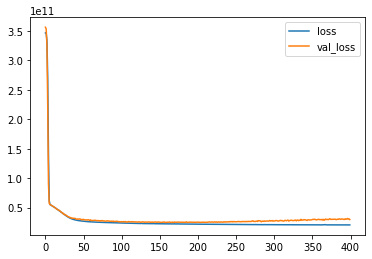

In [86]:
losses.plot()

#Evaluating test data

In [90]:
predictions = model.predict(X_test_1)
print(predictions)

[[510638.84]
 [476288.25]
 [618110.06]
 ...
 [466034.97]
 [695791.56]
 [206733.08]]


In [91]:
mean_squared_error(y_test_1,predictions)

29731844809.1126

In [92]:
explained_variance_score(y_test_1,predictions)

0.7108303158792539

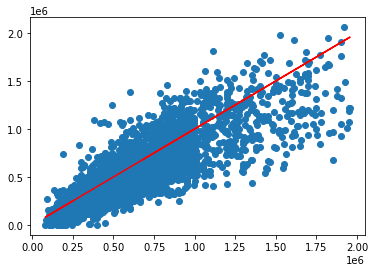

In [93]:
plt.scatter(y_test_1,predictions)
plt.plot(y_test_1,y_test_1,'r')
#not a straight line